#**HW2**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def drawpicture(x, y, title, xlabel = 'x', ylabel= 'y'):
  plt.plot(x, y, marker = '.')
  plt.grid(True)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

#1.

## Iterative function and Initial condition

In [3]:
def IterativeMethod(A, x, b, way, Lambda):
  newList = np.array(b)
  for i in range(len(A)):
    for j in range(len(A[i])):
      if i != j:
        newList[i] -= A[i][j] * x[j]
    newList[i] /= A[i][i]
    if way == 'Gauss-Seidel':
      x[i] = newList[i] * Lambda + x[i] * (1 - Lambda)
  if way == 'Jacobi':
    x = np.array(newList) * Lambda + x * (1 - Lambda)
  return x

def EndIteration(L, New, ConverRate = 0.1, DiverRate = 200):
  flagConver, flagDiver = True, True
  for i in range(len(L)):
    if flagConver and L[i][New] >= ConverRate:
      flagConver = False
    if flagDiver and L[i][New] <= DiverRate:
      flagDiver = False
  return flagConver or flagDiver

def GoThroughIteration(x, analysisAns, way, Lambda = 1):
  EndFlag, IterVar, ErrorRate, Ans = False, 0, [list(), list(), list(), list(), list(), list()], [list(), list(), list(), list(), list(), list()]
  while not EndFlag:
    x = IterativeMethod(A, x, b, way, Lambda)
    for i in range(len(x)):
      ErrorRate[i].append(100*abs(x[i]-analysisAns[i])/analysisAns[i])
      Ans[i].append(x[i])
    EndFlag = EndIteration(ErrorRate, IterVar)
    IterVar += 1
  return IterVar, ErrorRate, Ans

In [4]:
A = np.array([
    [1, -1, 0 ,0, 0, -1], 
    [0, 1, -1, 0 ,0 ,0], 
    [0, 0, 1, -1, 0, 0], 
    [0, 0, 0, 1, -1, 1], 
    [8, 0, 0, 0, 30, 25], 
    [0, 12, 5, 15, 0, -25]], dtype = 'float32')
b = np.array([0, 0, 0, 0, 100, 0], dtype = 'float32')

# #inital guess
InitX = np.array([2, 1, 1, 1, 2, 1], dtype = 'float32')

# test case on slide
# A = np.array([[3, 1], [1, 2]], dtype = 'float32')
# x = np.array([0, 0], dtype = 'float32')
# b = np.array([5, 5], dtype = 'float32')
# peek answer
Aiv = np.linalg.inv(A)
analysisAns = Aiv.dot(b)
print("Analysis Answer:", analysisAns)
CurrentName = ['12', '23', '34', '45', '56', '25']

Analysis Answer: [1.9217802  0.84288603 0.84288603 0.84288603 1.9217802  1.0788941 ]


##a).

Answer of X with Jacobi method

In [5]:
Jx = InitX.copy()
JIter, ErrorRate, Answer = GoThroughIteration(Jx, analysisAns, 'Jacobi')

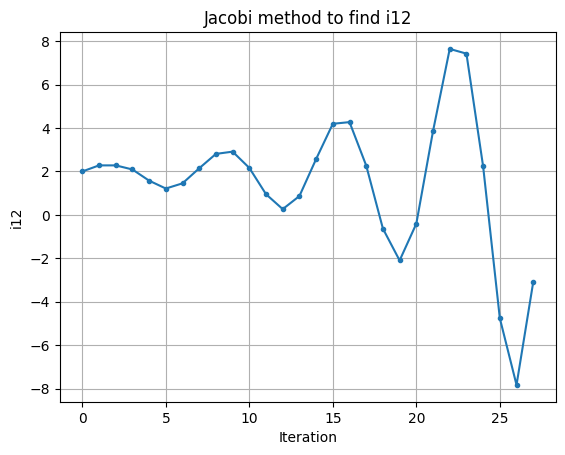

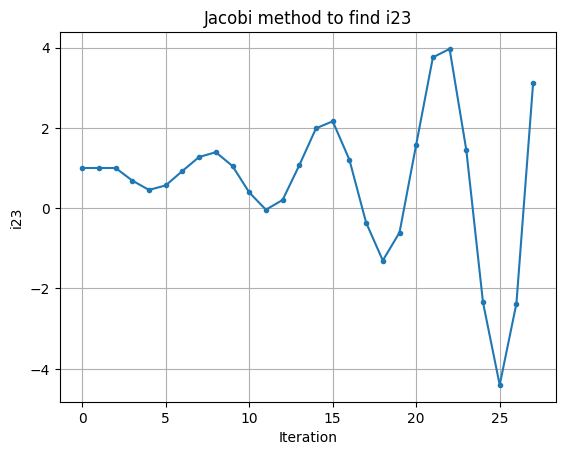

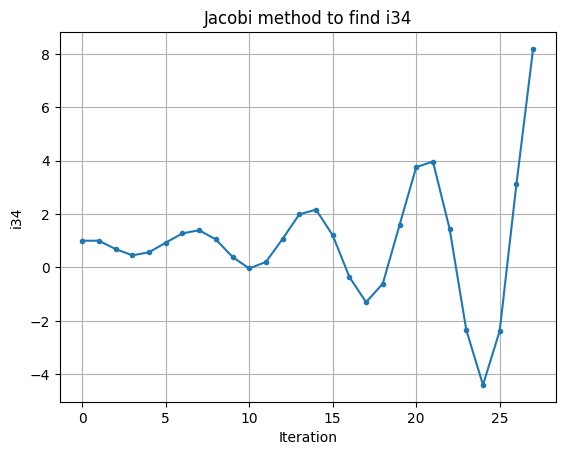

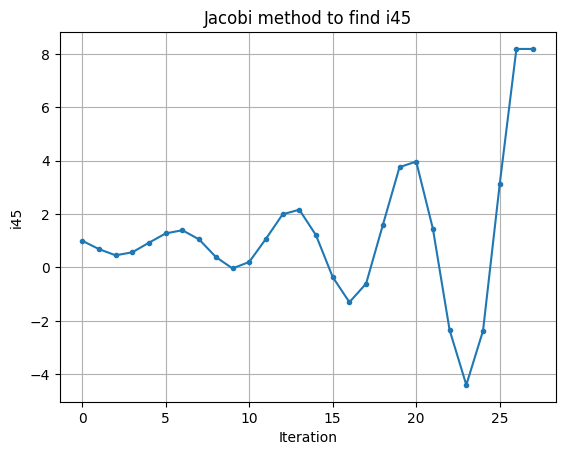

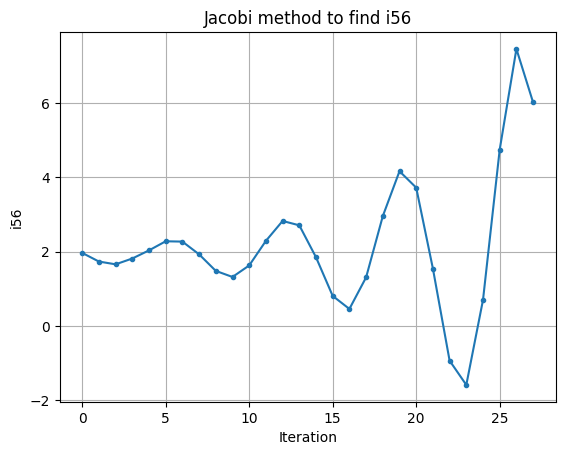

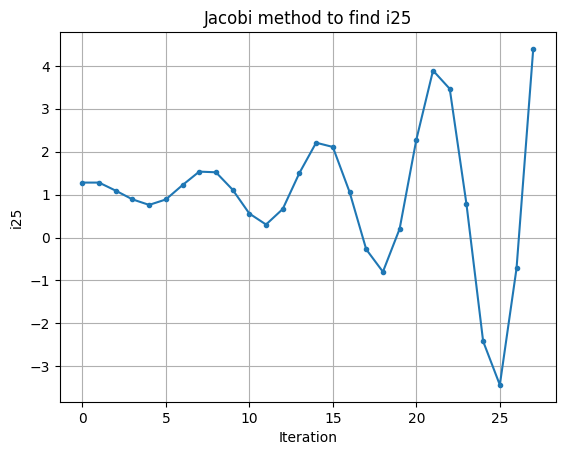

In [6]:
for i in range(len(CurrentName)):
  drawpicture(list(range(JIter)), Answer[i], 'Jacobi method to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'i'+CurrentName[i])

Error Rate curve of X with Jacobi method

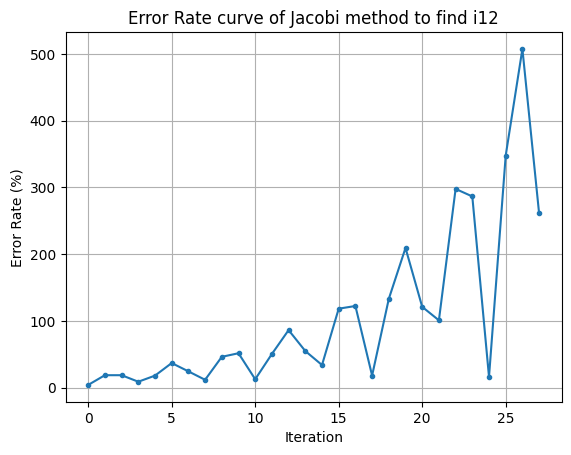

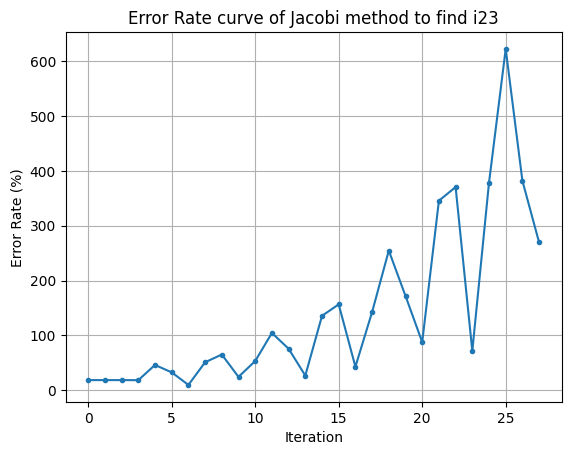

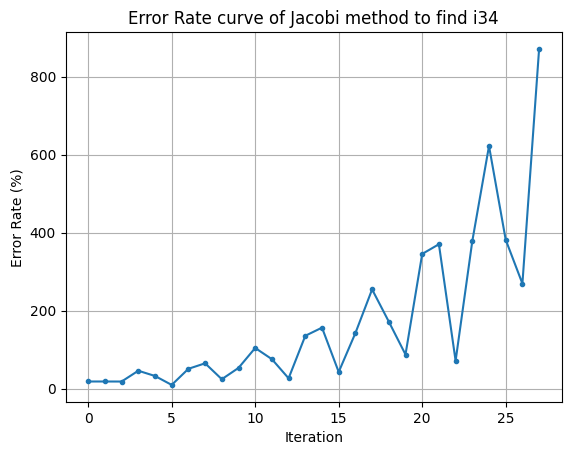

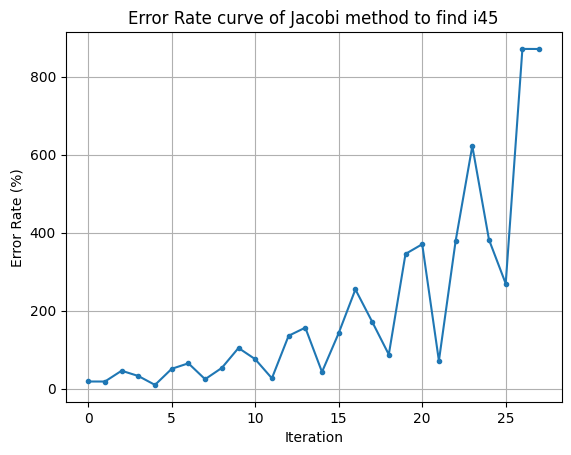

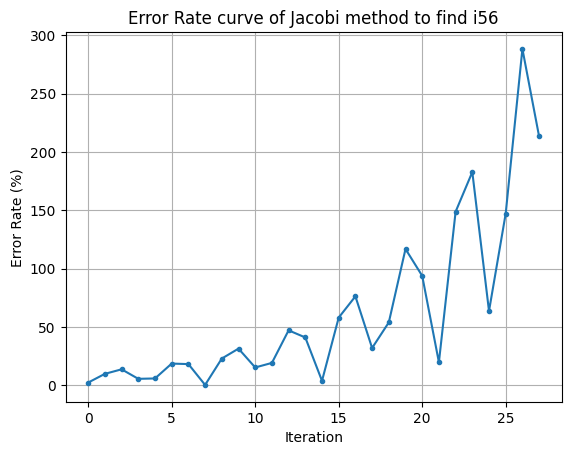

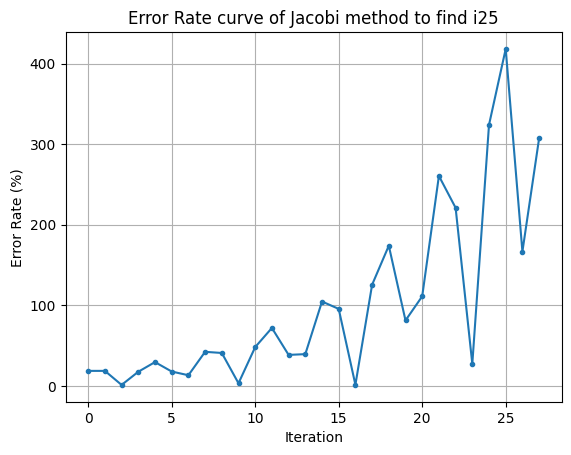

In [7]:
for i in range(len(CurrentName)):
  drawpicture(list(range(JIter)), ErrorRate[i], 'Error Rate curve of Jacobi method to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'Error Rate (%)')

##b).

Answer of X with Gauss-Seidel method

In [8]:
Gx = InitX.copy()
GIter, ErrorRate, Answer = GoThroughIteration(Gx, analysisAns, 'Gauss-Seidel')

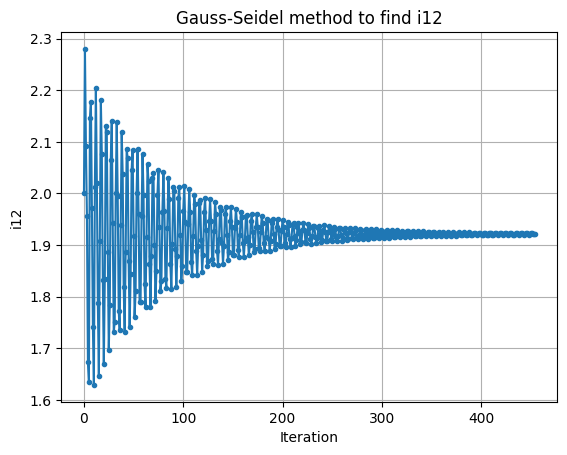

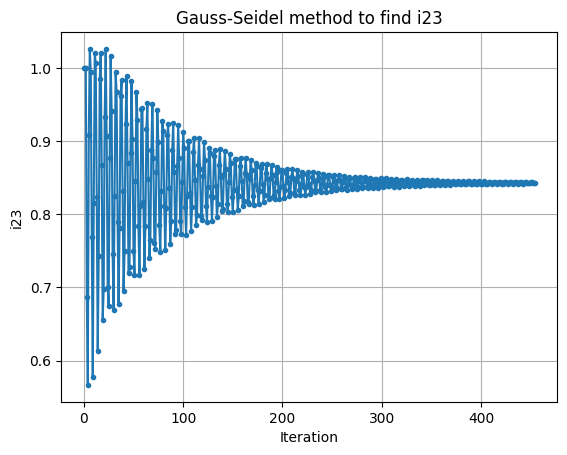

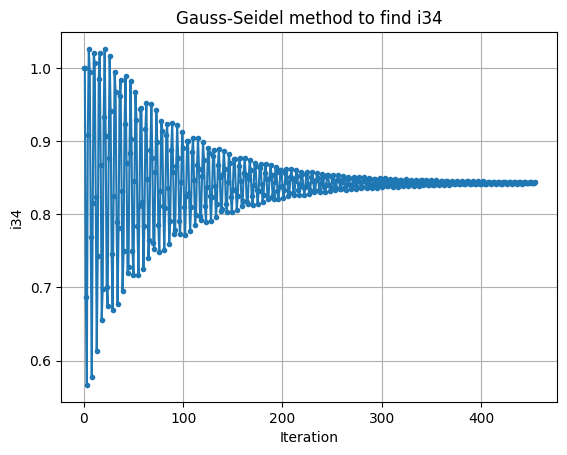

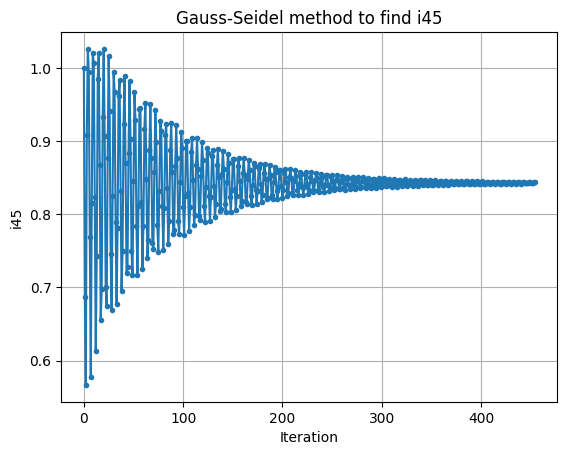

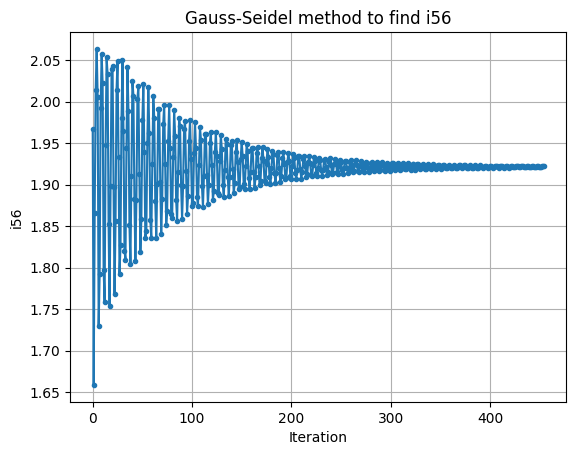

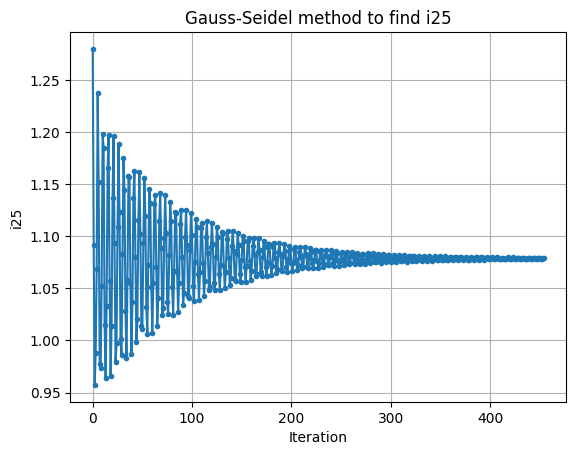

In [9]:
for i in range(len(CurrentName)):
  drawpicture(list(range(GIter)), Answer[i], 'Gauss-Seidel method to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'i'+CurrentName[i])

Error Rate curve of X with Gauss-Seidel method

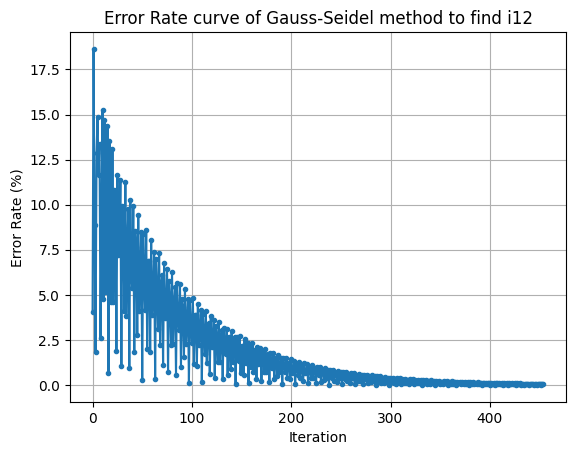

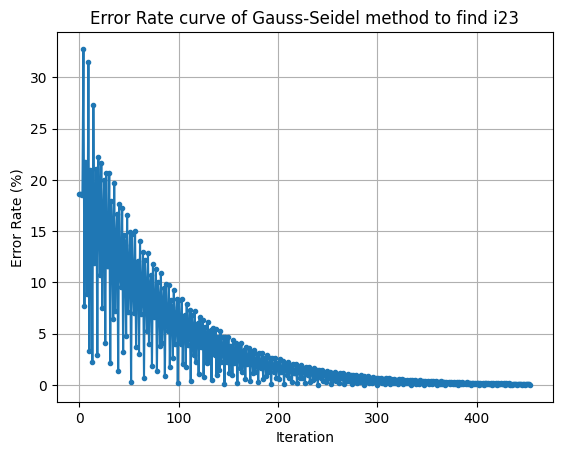

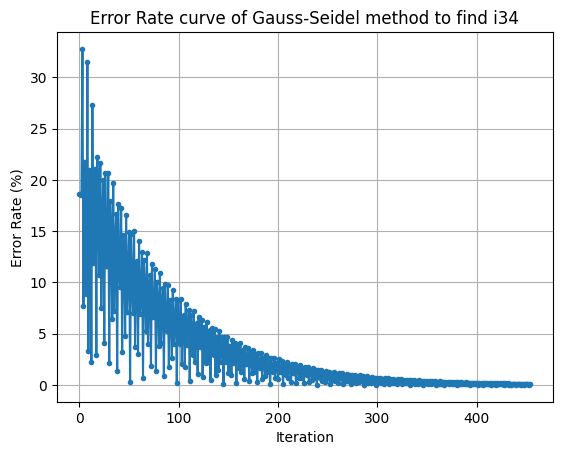

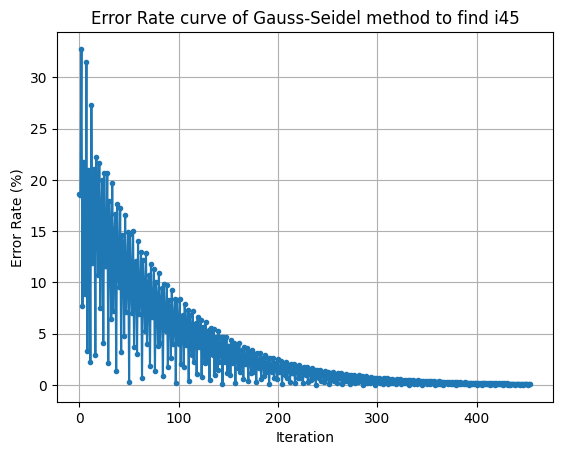

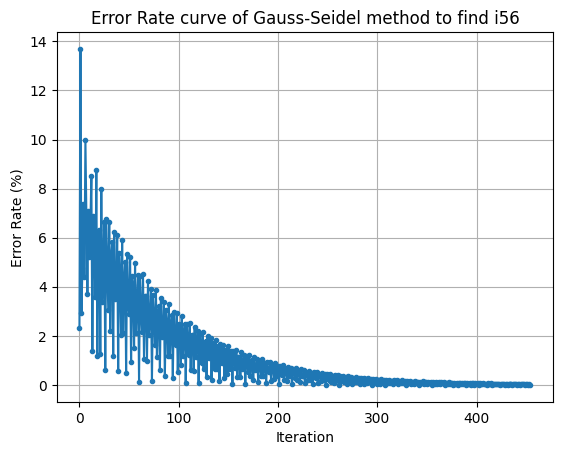

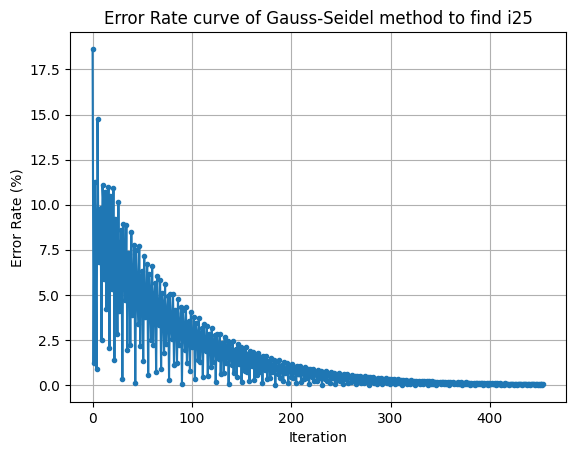

In [10]:
for i in range(len(CurrentName)):
  drawpicture(list(range(GIter)), ErrorRate[i], 'Error Rate curve of Gauss-Seidel method to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'Error Rate (%)')

##c)-1.

For λ=0.3

Ans of X with Gauss-Seidel method

In [11]:
xlambda3 = InitX.copy()
Iterlambda3, ErrorRate, Answer = GoThroughIteration(xlambda3, analysisAns, 'Gauss-Seidel', 0.3)

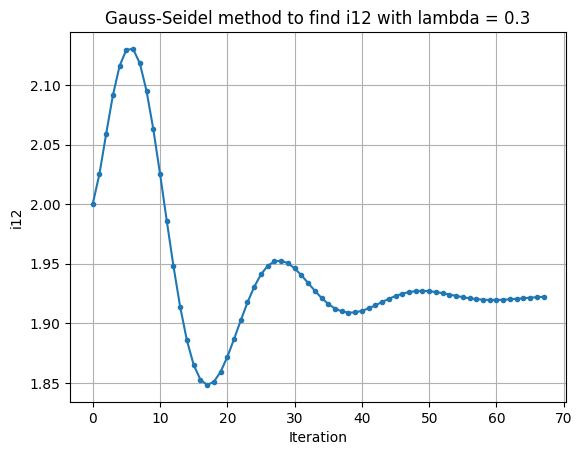

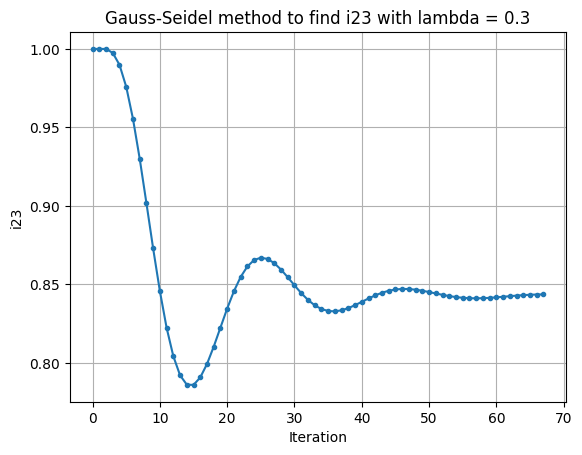

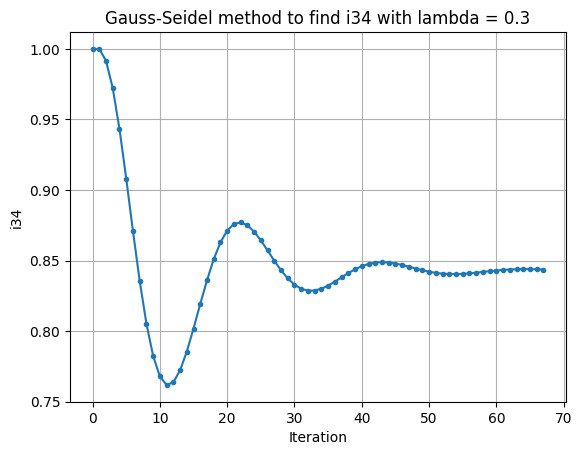

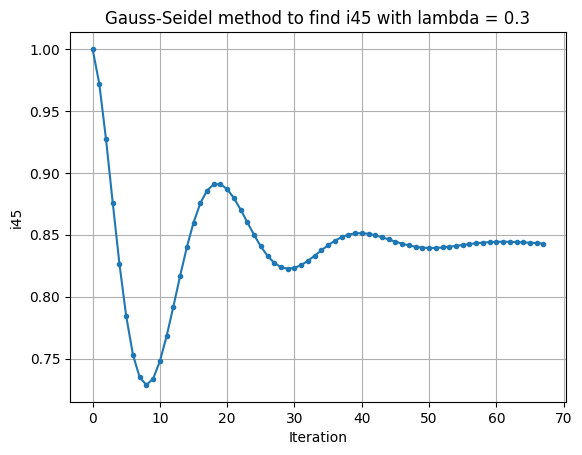

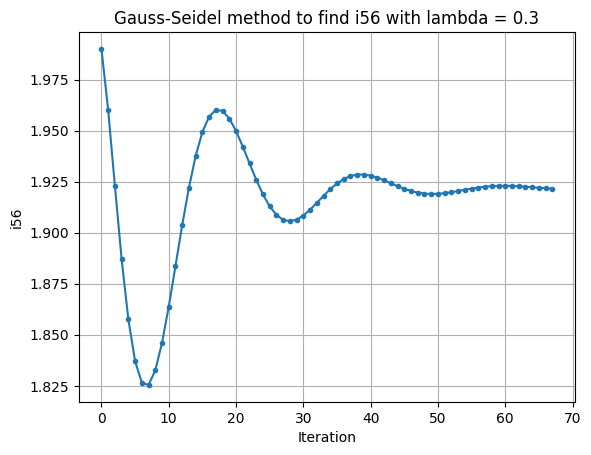

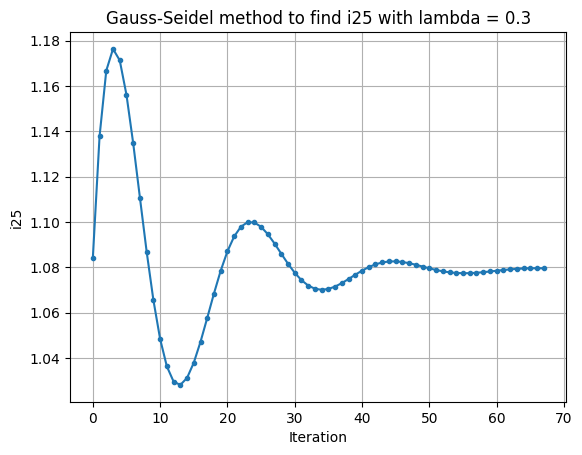

In [12]:
for i in range(len(CurrentName)):
  drawpicture(list(range(Iterlambda3)), Answer[i], 'Gauss-Seidel method to find i'+CurrentName[i]+' with lambda = 0.3', xlabel = 'Iteration', ylabel = 'i'+CurrentName[i])

For λ=0.3

Error Rate curve of X with Gauss-Seidel method

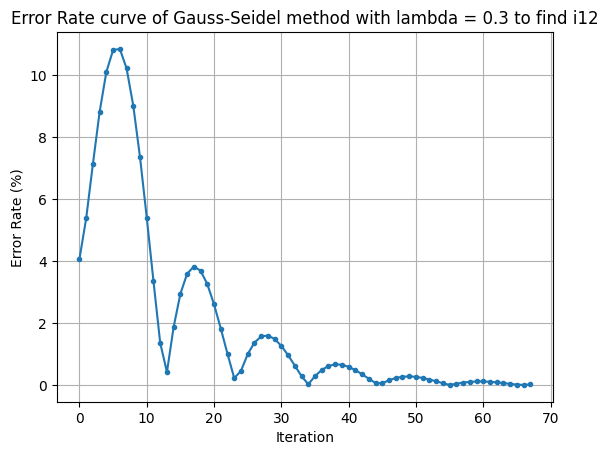

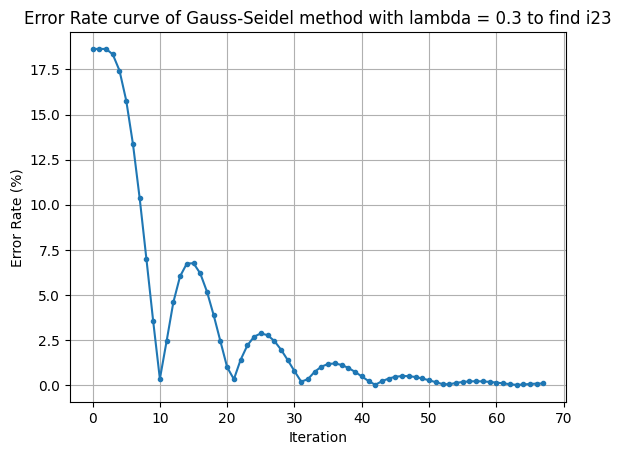

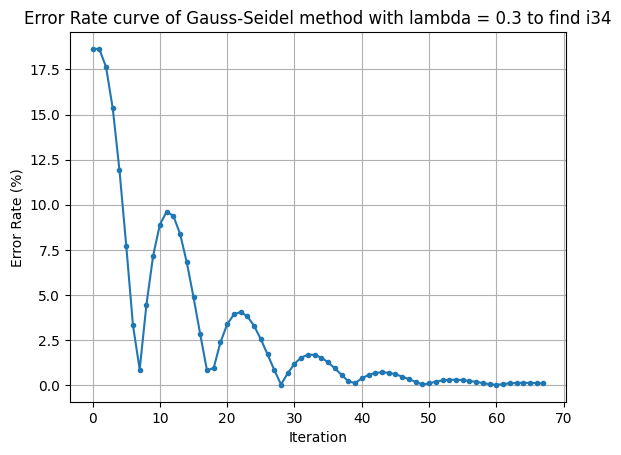

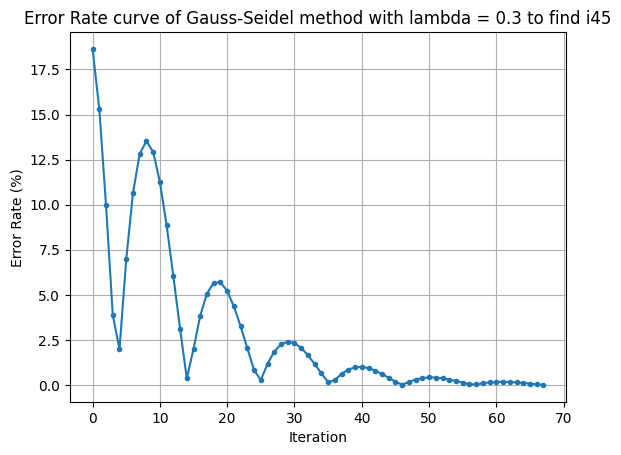

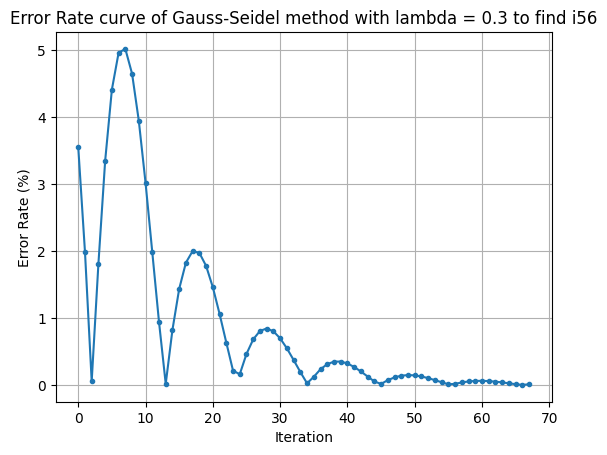

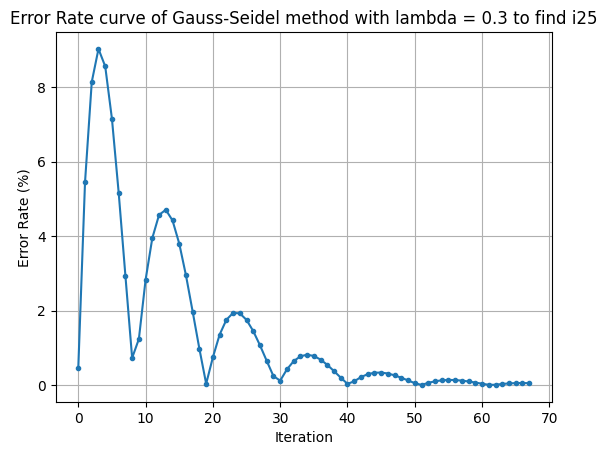

In [13]:
for i in range(len(CurrentName)):
  drawpicture(list(range(Iterlambda3)), ErrorRate[i], 'Error Rate curve of Gauss-Seidel method with lambda = 0.3 to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'Error Rate (%)')

##c).-2

For λ=0.7

Ans of X with Gauss-Seidel method

In [14]:
xlambda7 = InitX.copy()
Iterlambda7, ErrorRate, Answer = GoThroughIteration(xlambda7, analysisAns, 'Gauss-Seidel', 0.7)

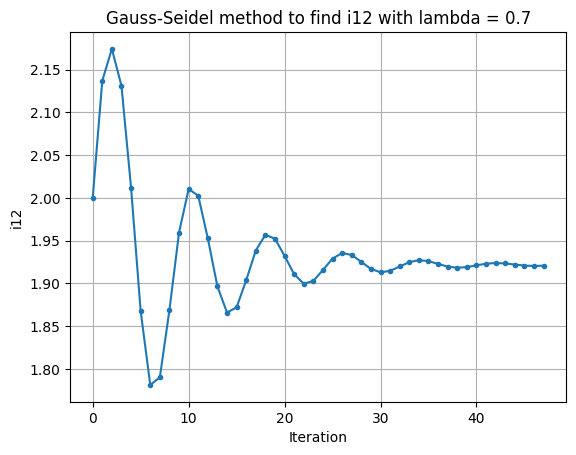

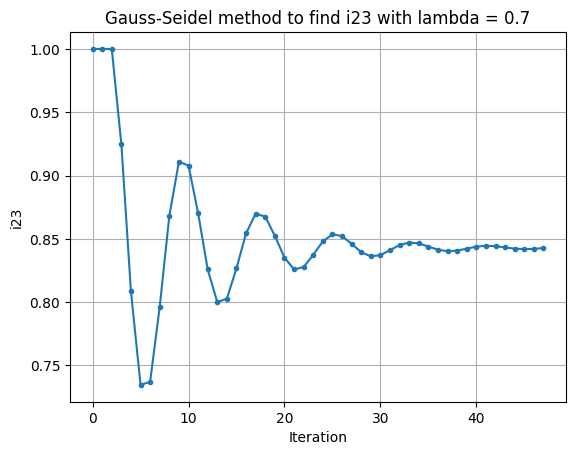

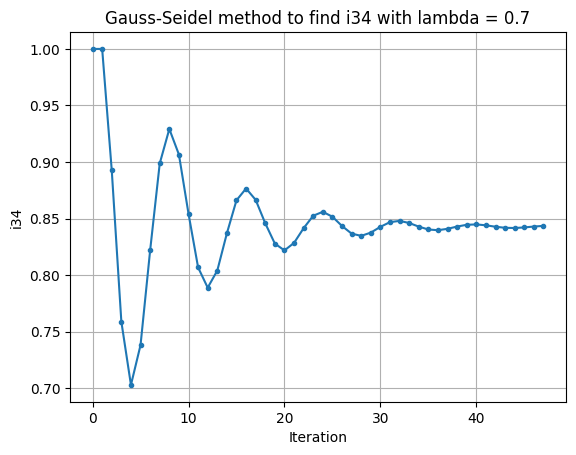

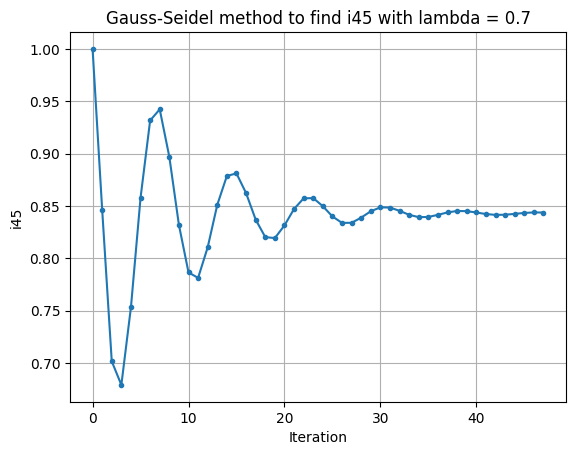

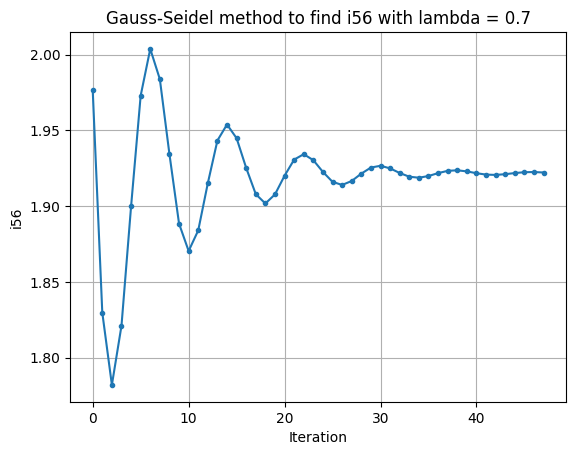

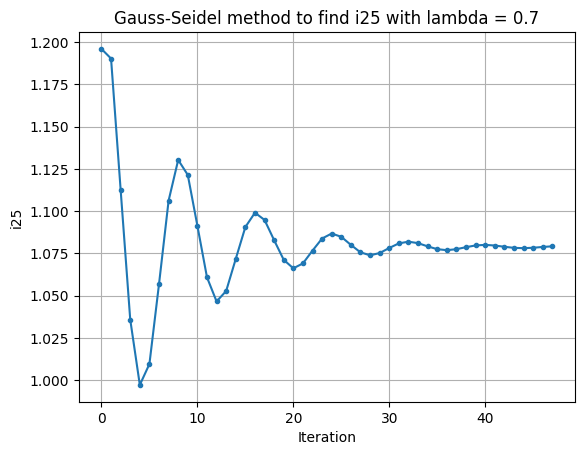

In [15]:
for i in range(len(CurrentName)):
  drawpicture(list(range(Iterlambda7)), Answer[i], 'Gauss-Seidel method to find i'+CurrentName[i]+' with lambda = 0.7', xlabel = 'Iteration', ylabel = 'i'+CurrentName[i])

For λ=0.7

Error Rate curve of X with Gauss-Seidel method

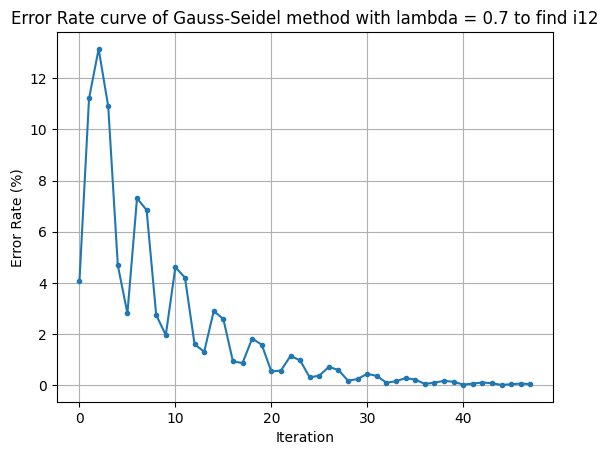

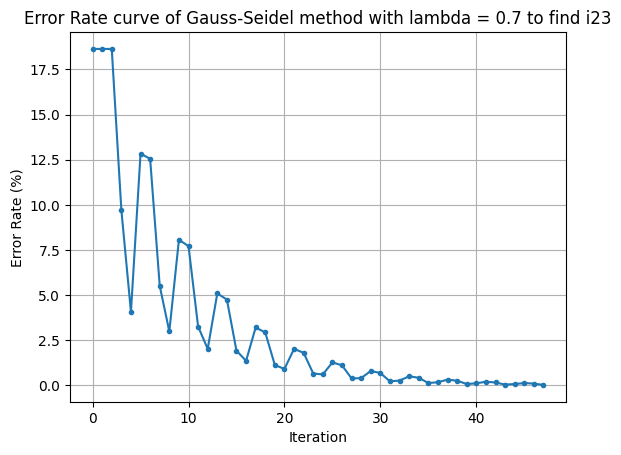

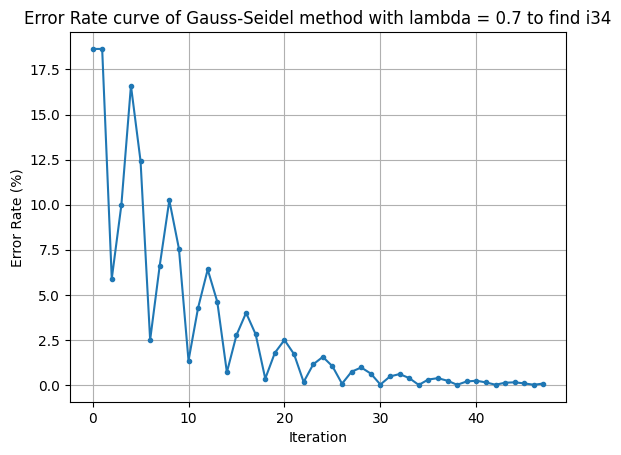

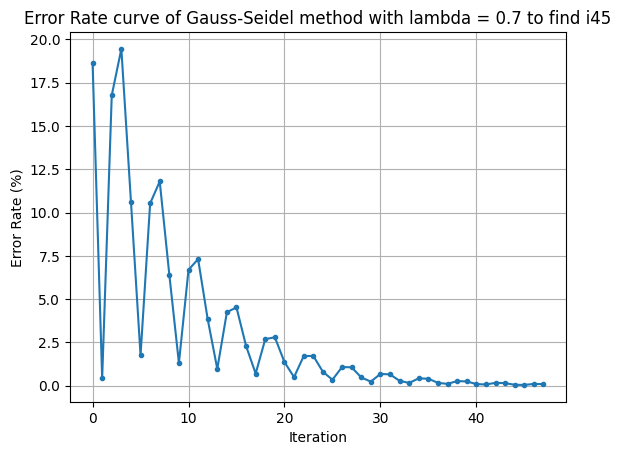

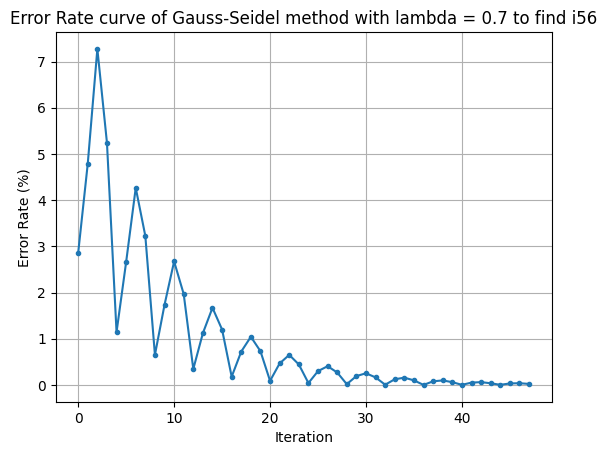

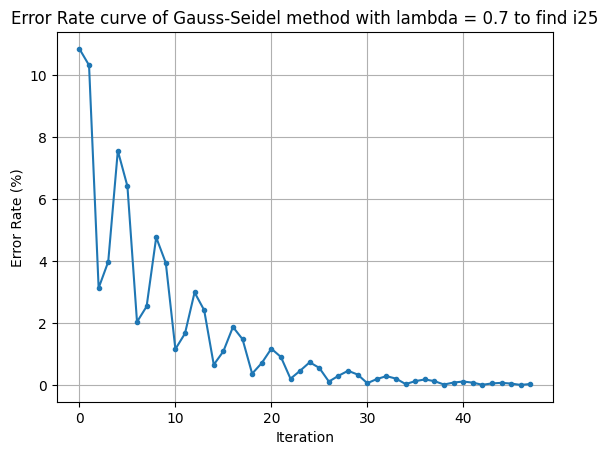

In [16]:
for i in range(len(CurrentName)):
  drawpicture(list(range(Iterlambda7)), ErrorRate[i], 'Error Rate curve of Gauss-Seidel method with lambda = 0.7 to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'Error Rate (%)')

##c).-3

For λ=1.2

Answer of X with Gauss-Seidel method

In [17]:
xlambda12 = InitX.copy()
Iterlambda12, ErrorRate, Answer = GoThroughIteration(xlambda12, analysisAns, 'Gauss-Seidel', 1.2)

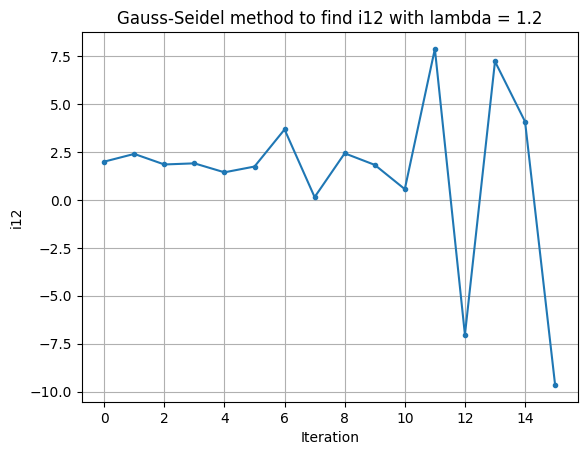

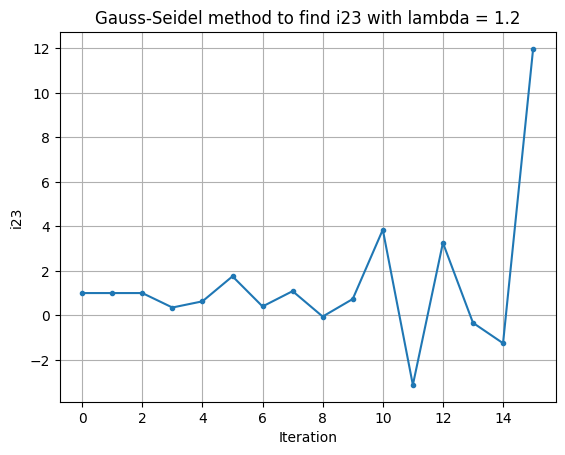

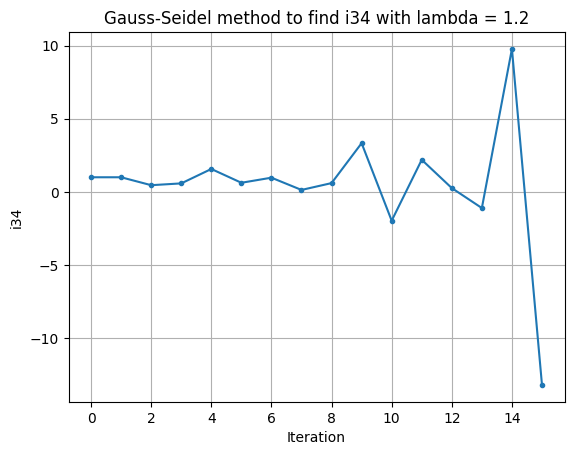

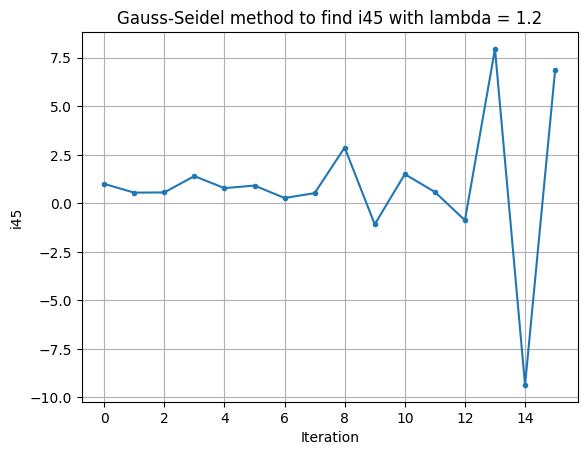

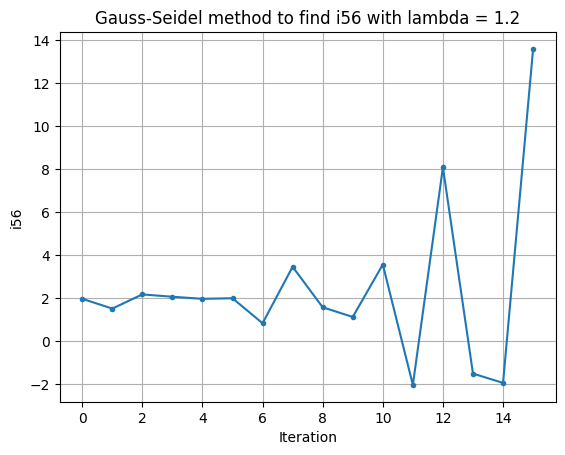

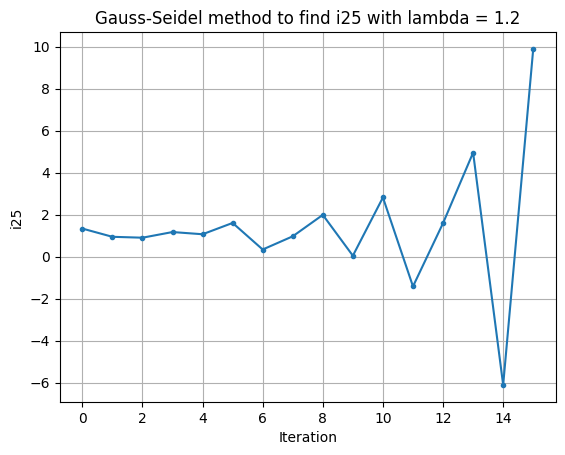

In [18]:
for i in range(len(CurrentName)):
  drawpicture(list(range(Iterlambda12)), Answer[i], 'Gauss-Seidel method to find i'+CurrentName[i]+' with lambda = 1.2', xlabel = 'Iteration', ylabel = 'i'+CurrentName[i])

For λ=1.2

Error Rate curve of X with Gauss-Seidel method

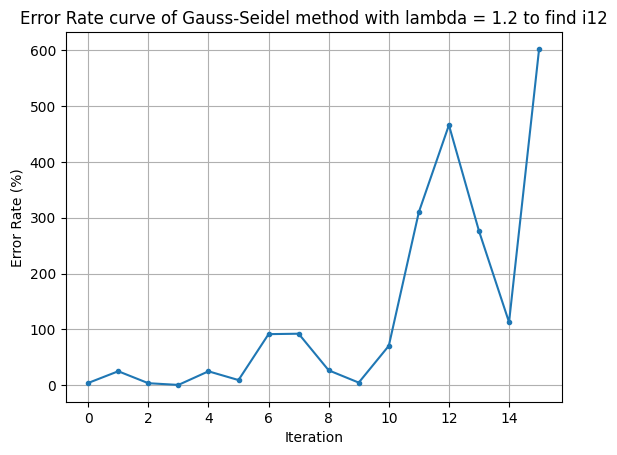

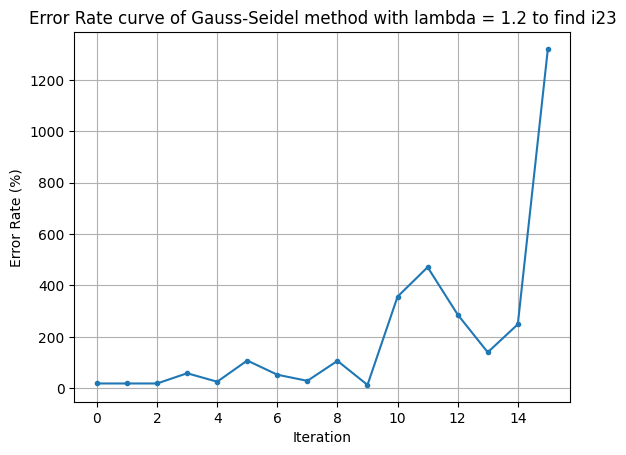

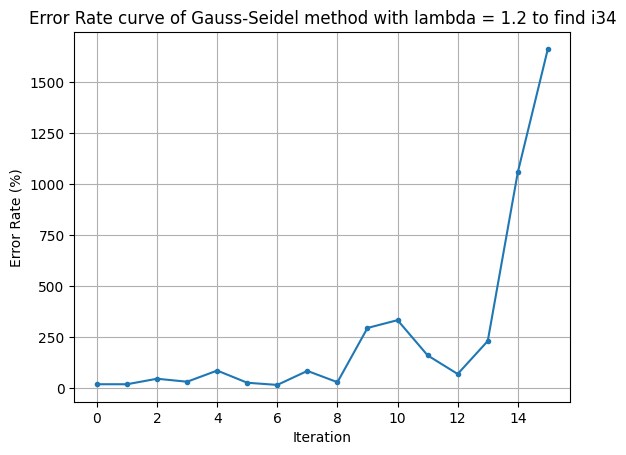

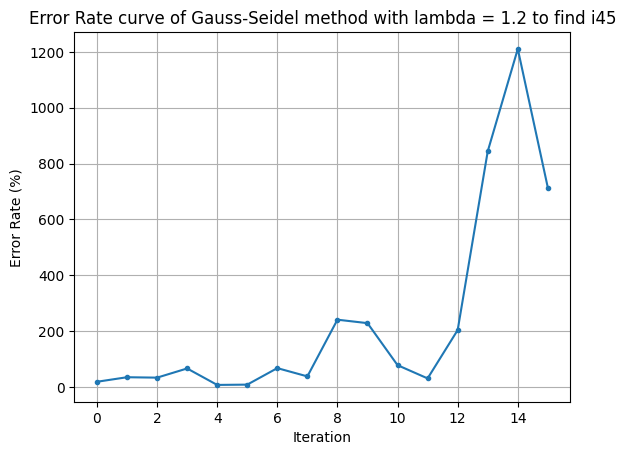

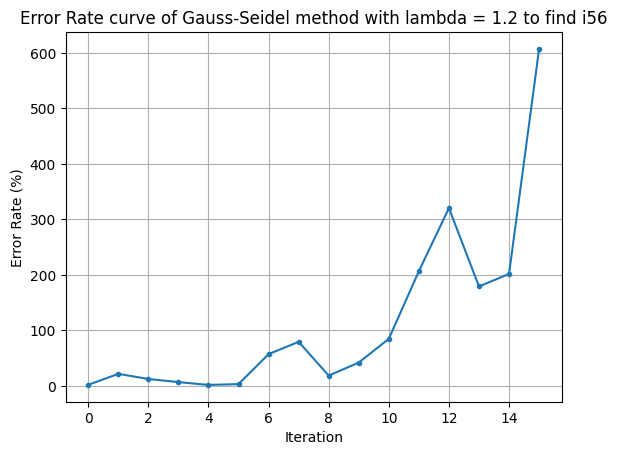

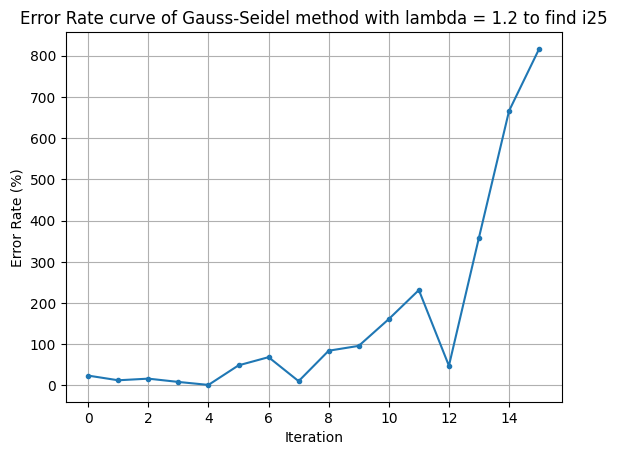

In [19]:
for i in range(len(CurrentName)):
  drawpicture(list(range(Iterlambda12)), ErrorRate[i], 'Error Rate curve of Gauss-Seidel method with lambda = 1.2 to find i'+CurrentName[i], xlabel = 'Iteration', ylabel = 'Error Rate (%)')

#2.

In [20]:
from random import uniform

In [21]:
def MonteCarlomethod(numberPoint):
  numberInCircle = 0
  for i in range(numberPoint):
    if (uniform(0, 1)**2 + uniform(0, 1)**2)**0.5 < 1:
      numberInCircle += 1
  return 4*numberInCircle/numberPoint

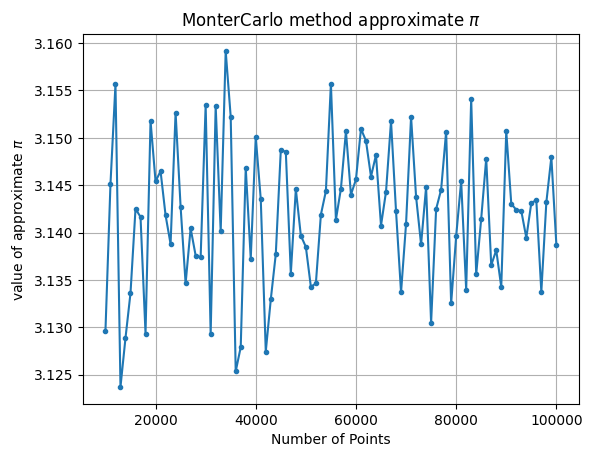

In [22]:
piList = list()
for i in range(10000, 101000, 1000):
  piList.append(MonteCarlomethod(i))
drawpicture(range(10000, 101000, 1000), piList, 'MonterCarlo method approximate $\\pi$', xlabel = 'Number of Points', ylabel = 'value of approximate $\\pi$')

#3



In [23]:
from math import pi, sin, cos, atan, exp, log
from random import normalvariate

##a).

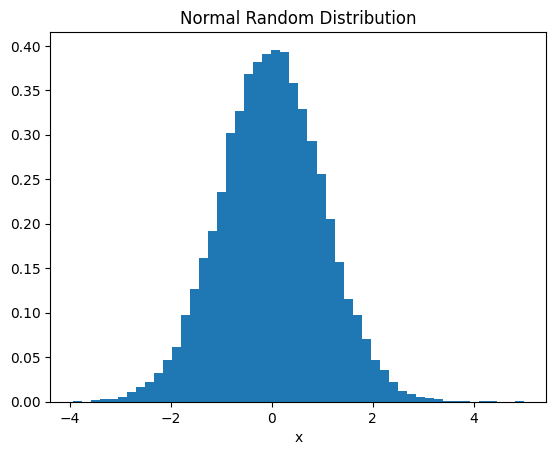

In [24]:
NorDistribution = list()
for i in range(20000):
  NorDistribution.append(normalvariate(0, 1))
plt.hist(NorDistribution, density=True, bins = 50)
plt.xlabel('x')
plt.title('Normal Random Distribution')
plt.show()

##b). and c).

In [25]:
def simulation(r, theta = 45, pointNum = 20000, xlabel = '$\\theta$', ylabel = 'Probability'):
  x, y = r * sin(theta*pi/180), r * cos(theta*pi/180)
  thetaList = list()
  for i in range(pointNum):
    tx = x + normalvariate(0, 1)
    ty = y + normalvariate(0, 1)
    thetaList.append(180/pi * atan(tx/ty))
  plt.hist(thetaList, density = True, bins = 50)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title("Distrubition of $\\theta$ with r = "+str(r))
  plt.show()

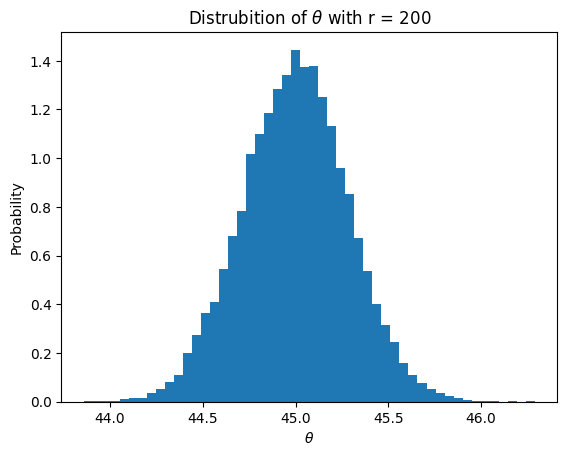

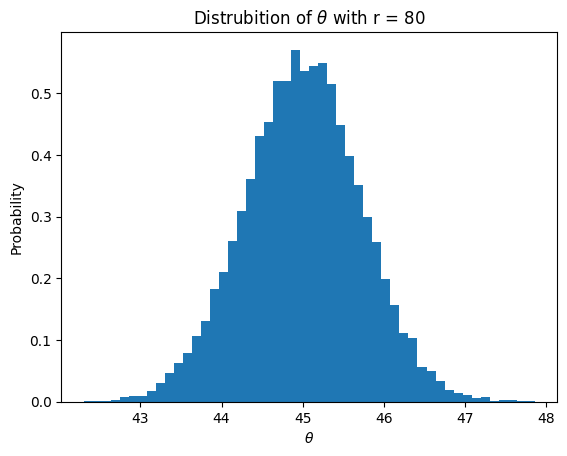

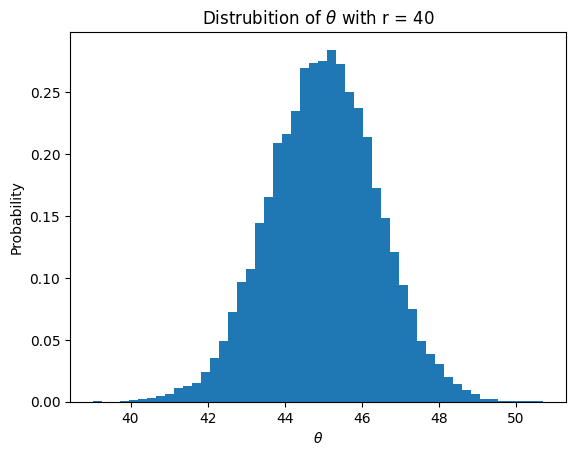

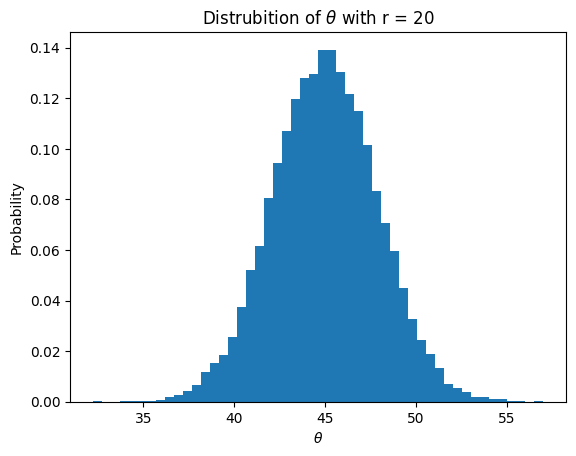

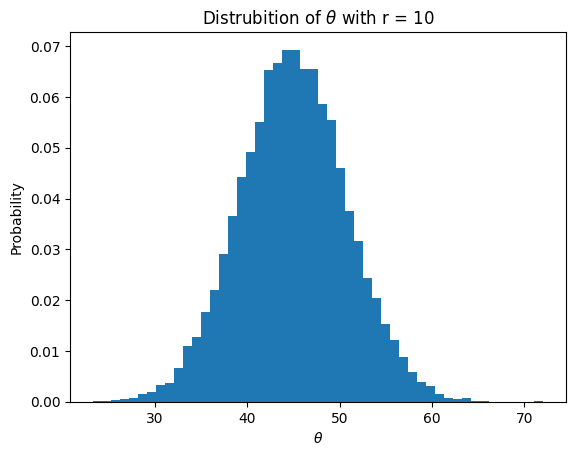

In [26]:
rList = [200, 80, 40, 20, 10]
for r in rList:
  simulation(r)

##e).

In [142]:
def complexSignal(t, theta0 = 0, S0 = 100, T2 = 32, omaga = pi/200):
  return S0 * exp(-t/T2) * cos(omaga*t + theta0*pi/180) + normalvariate(0, 1), S0 * exp(-t/T2) * sin(omaga*t + theta0*pi/180) + normalvariate(0, 1)
def regression(theta, t, weight):
  X = list()
  for i in range(len(t)):
    X.append([weight[i], weight[i] * t[i]])
  return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), np.array(weight) * np.array(theta))[1]
def figureOmega(tList = [10, 50, 90], weightList =  [1, 1, 1], NumberPoint = 30000):
  omegaList = list()
  for t in range(NumberPoint):
    thetaList = list()
    for i in range(len(tList)):
      x, y = complexSignal(tList[i])
      thetaList.append((180/pi)*(atan(y/x) if atan(y/x) > 0 else atan(y/x) + pi))
    omegaList.append(regression(thetaList, tList, weight = weightList))

  plt.hist(omegaList, density = True, bins = 50)
  plt.xlabel('$\\omega$')
  plt.title('histogram of $\\omega$ '+("before" if weightList == [1 ,1 ,1] else "after")+" weighting")
  plt.text(0.8, 0.75, r'$\mu = $'+str(round(np.average(omegaList), 6)))
  plt.text(0.8, 0.5, r'$\sigma = $'+str(round(np.std(omegaList), 6)))

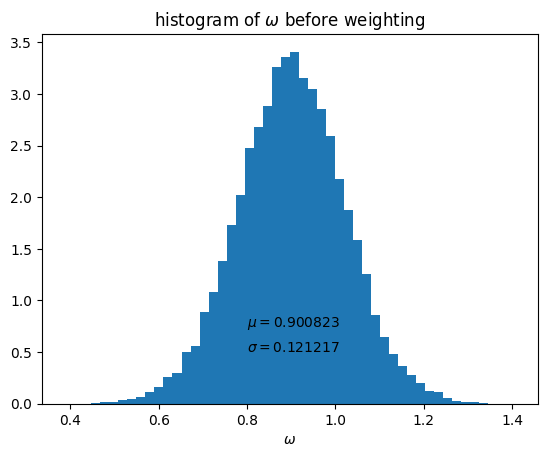

In [143]:
figureOmega()

f).

In [144]:
def observedifftime(t, pointNum = 20000, xlabel = '$\\theta$', ylabel = 'distribution', weight = 1):
  thetaList = list()
  for i in range(pointNum):
    x, y = complexSignal(t)
    thetaList.append((180/pi)*(atan(y/x) if atan(y/x) > 0 else atan(y/x) + pi)*weight)
  plt.text(round(np.average(thetaList), 6), 0.02, r'$\sigma = $'+str(round(np.std(thetaList), 6)))
  plt.hist(thetaList, density = True, bins = 50)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title("Distrubition of time = "+str(t))
  plt.show()
  return 1/np.std(thetaList)

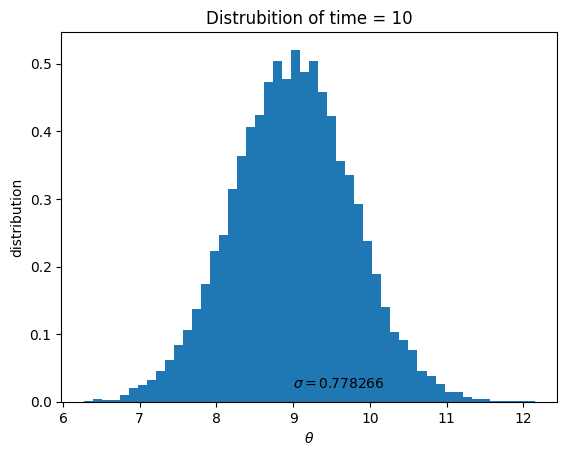

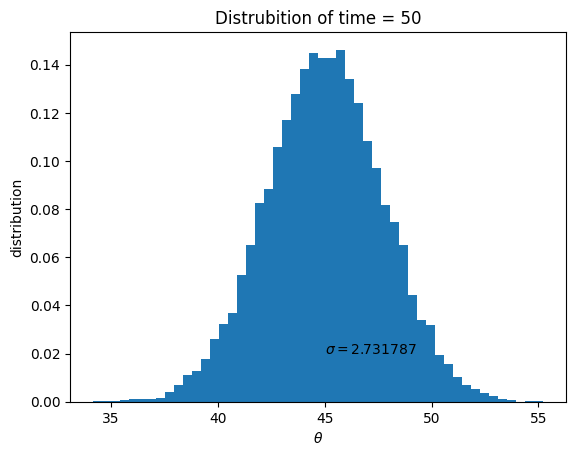

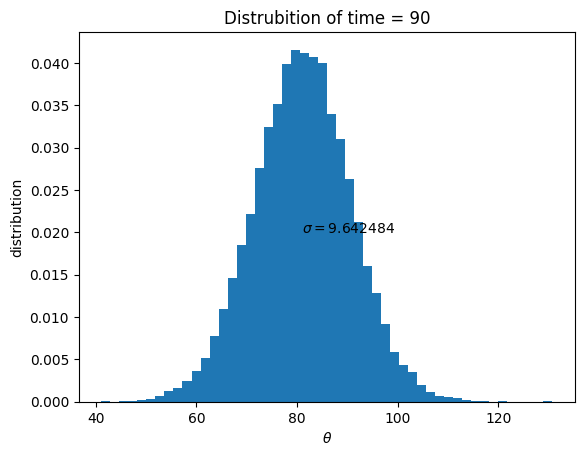

In [145]:
timeList = [10, 50, 90]
weightList = list()
for t in timeList:
  weightList.append(observedifftime(t, weight = 1))

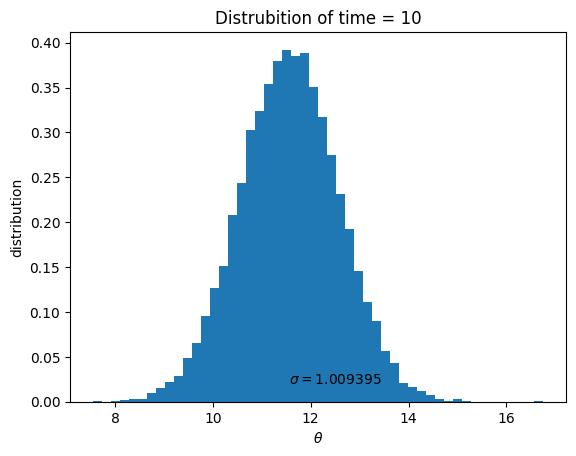

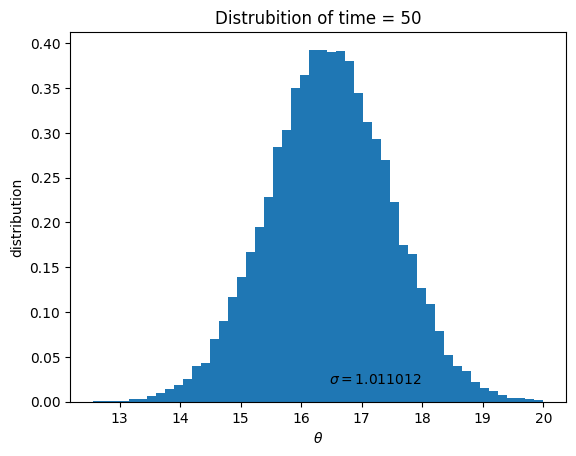

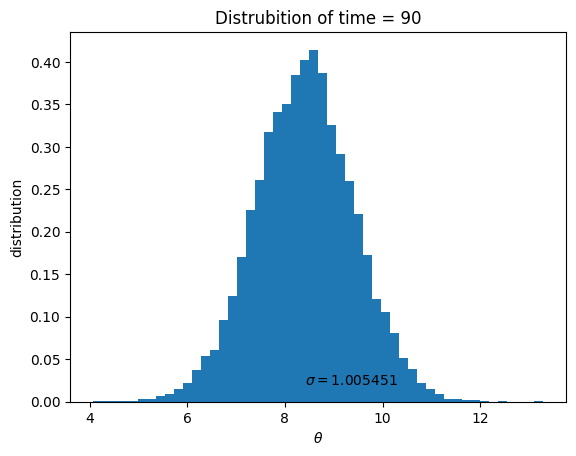

In [146]:
for i in range(len(timeList)):
  observedifftime(timeList[i], weight = weightList[i])

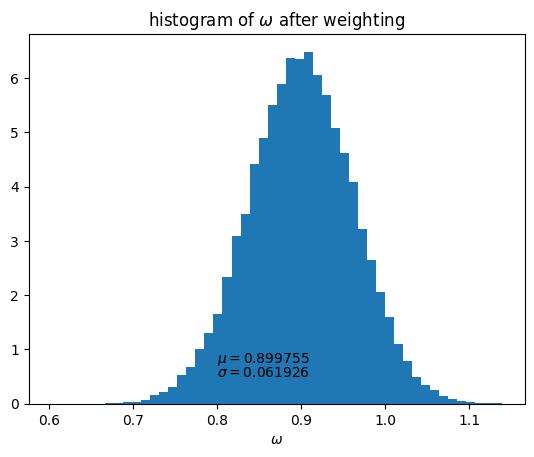

In [147]:
figureOmega(weightList = weightList)